# 2조 최하민 공공데이터 파싱

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns
from matplotlib import rcParams

cv_test = pd.read_csv("C:/Users/BIT/Downloads/project_1.csv", encoding='utf-8') #다운받은 csv파일 불러오기
plt.rc('font', family='Malgun Gothic') #현재 rcParams을  맑은고딕폰트로 설정해준다.
plt.rcParams['axes.unicode_minus'] = False #마이너스 기호의 깨짐 방지
cv_test['등록일자'] = pd.to_datetime(cv_test['등록일자']) #등록일자의 데이터 타입이 object인 문자열 형식이기때문에 datetime인 날짜형식으로 바꾸어줌

In [405]:
a = cv_test.sort_values(by = '등록일자', ascending = False) #등록일자 기준으로 내림차순 정렬
a

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,분실장소,분실물등록자ID,분실물명,분실물종류,수령자치구,수령위치(회사),수령물건,조회수,추출일자
0,61733474,수령,2022-01-06,2022-01-06 00:00:00.0,저희 원버스에서는 2022년 01월 06일 핸드폰을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,원버스,여자핸드백,핸드폰,eunpyong,원버스,파크빌아파트-은평공영차고지,20.0,2022-01-06 00:00:00.0
4,61733472,수령,2022-01-06,2022-01-04 00:00:00.0,저희 원버스에서는 2022년 01월 04일 기타을(를) 습득/보관 하(였습니다.)고...,회사내 분실센터,원버스,안경집에든안경,기타,eunpyong,원버스,홍대입구-은평공영차고지,2.0,2022-01-04 00:00:00.0
6,61733451,수령,2022-01-06,2022-01-03 00:00:00.0,저희 원버스에서는 2022년 01월 03일 핸드폰을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,원버스,아이폰(휴대폰),핸드폰,eunpyong,원버스,홍대입구-은평공영차고지,0.0,2022-01-03 00:00:00.0
7,61733471,수령,2022-01-06,2022-01-03 00:00:00.0,저희 원버스에서는 2022년 01월 03일 지갑을(를) 습득/보관 하(였습니다.)고...,회사내 분실센터,원버스,카드지갑(여),지갑,eunpyong,원버스,독립문파크빌-은평공영차고지,22.0,2022-01-03 00:00:00.0
1,61733473,수령,2022-01-06,2022-01-05 00:00:00.0,저희 원버스에서는 2022년 01월 05일 기타을(를) 습득/보관 하(였습니다.)고...,회사내 분실센터,원버스,빨간벙어리장갑,기타,eunpyong,원버스,홍대입구-은평공영차고지,2.0,2022-01-05 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530,1368397,보관,NaT,2018-04-25 00:00:00.0,NaN,개화역,NaN,NaN,기타,NaN,NaN,NaN,7.0,2018-04-26 00:00:00.0
26682,1364084,보관,NaT,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2017-04-26 00:00:00.0
30188,1360729,보관,NaT,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2017-03-25 00:00:00.0
158790,1228831,보관,NaT,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2016-09-23 00:00:00.0


In [406]:
b = pd.DataFrame(a, columns = ['등록일자', '분실물종류']) #등록일자와 분실물종류만 추출해서 b에 저장
b = b.reset_index() #등록일자기준으로 내림차순되어있는 데이터프레임은 인덱스번호가 뒤죽박죽이기에 리셋시킴
num = pd.DataFrame({ 'Num' : range(1, 275522)})
c = pd.concat([num, b], axis=1) #컬럼명은 Num이고 1부터 275521까지 적혀있는 데이터프레임과 b의 데이터프레임을 옆으(가로)로 합치고 c에 저장
d = pd.DataFrame(c, columns = ['Num','등록일자','분실물종류']) #대괄호 안에있는 컬럼명만 빼서 d에 저장

In [407]:
###loc로 최근 1년과 최근 1년 월별로 끊어서 각각 데이터프레임을 만드는 과정
years = d.loc[0:1520]
January = d.loc[1435:1538]
February = d.loc[1342:1434]
March = d.loc[1202:1341]
April = d.loc[1072:1201]
May = d.loc[922:1071]
June = d.loc[730:921]
July = d.loc[643:729]
August = d.loc[539:642]
September = d.loc[414:538]
October = d.loc[303:413]
November =  d.loc[162:302]
December = d.loc[0:161]
Recent = d.loc[0:40]

###월별 분실물종류별 합계
January_df = January['분실물종류'].value_counts().rename_axis('1월').reset_index(name='합계')
February_df = February['분실물종류'].value_counts().rename_axis('2월').reset_index(name='합계')
March_df = March['분실물종류'].value_counts().rename_axis('3월').reset_index(name='합계')
April_df = April['분실물종류'].value_counts().rename_axis('4월').reset_index(name='합계')
May_df = May['분실물종류'].value_counts().rename_axis('5월').reset_index(name='합계')
June_df = June['분실물종류'].value_counts().rename_axis('6월').reset_index(name='합계')
July_df = July['분실물종류'].value_counts().rename_axis('7월').reset_index(name='합계')
August_df = August['분실물종류'].value_counts().rename_axis('8월').reset_index(name='합계')
September_df = September['분실물종류'].value_counts().rename_axis('9월').reset_index(name='합계')
October_df = October['분실물종류'].value_counts().rename_axis('10월').reset_index(name='합계')
November_df = November['분실물종류'].value_counts().rename_axis('11월').reset_index(name='합계')
December_df = December['분실물종류'].value_counts().rename_axis('12월').reset_index(name='합계')
years_df = years['분실물종류'].value_counts().rename_axis('1년').reset_index(name='합계')

# 1년동안 분실된 휴대폰개수 그래프

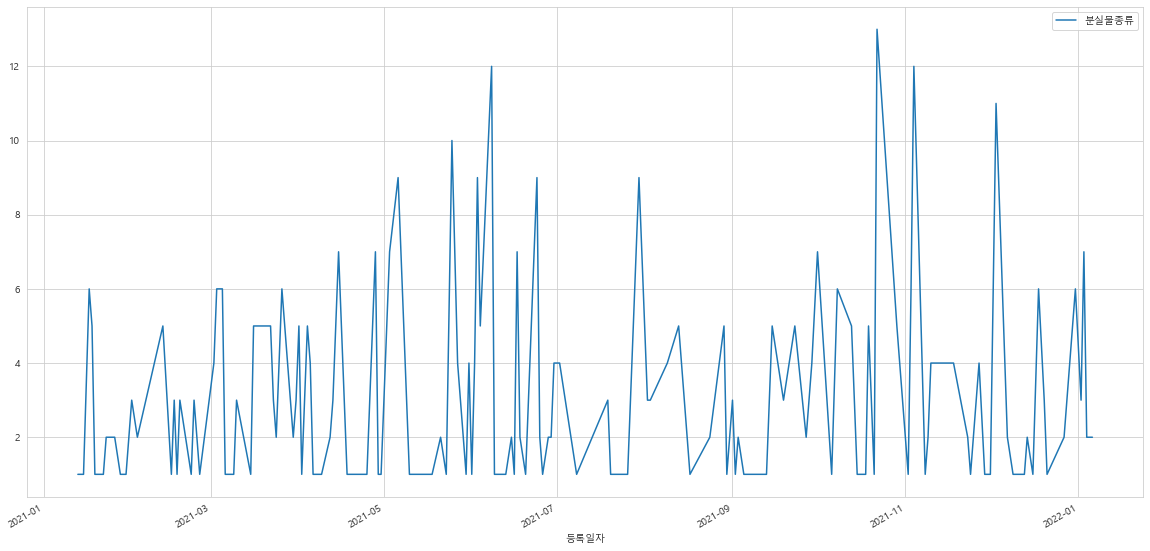

In [408]:
year_new = years.groupby(['등록일자','분실물종류'])['분실물종류'].count()
year_new = pd.DataFrame(year_new)
year_new.xs(('핸드폰'),level = '분실물종류',axis = 0)
yn = year_new.xs(('핸드폰'),level = '분실물종류')
yn.plot(figsize=(20,10))
plt.show()

# seaborn 모듈 countplot함수를 이용해 종류별 개수를 그래프로 표현(2021년 1월)

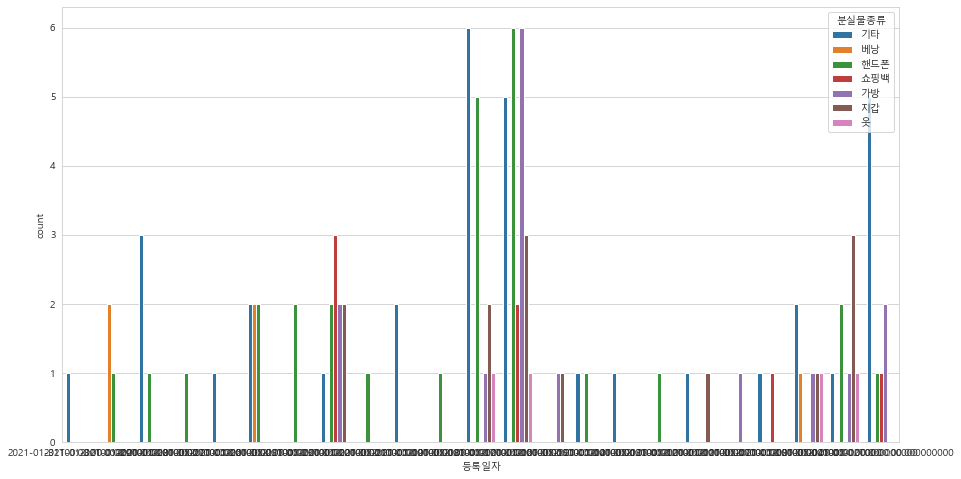

In [403]:
sns.countplot(x="등록일자", hue="분실물종류", data=January)
# rcParams['figure.figsize'] = 15,8
# plt.figure(figsize = (15,8))
plt.show()

# 2022년 1월6일까지의 분실물 종류와 개수

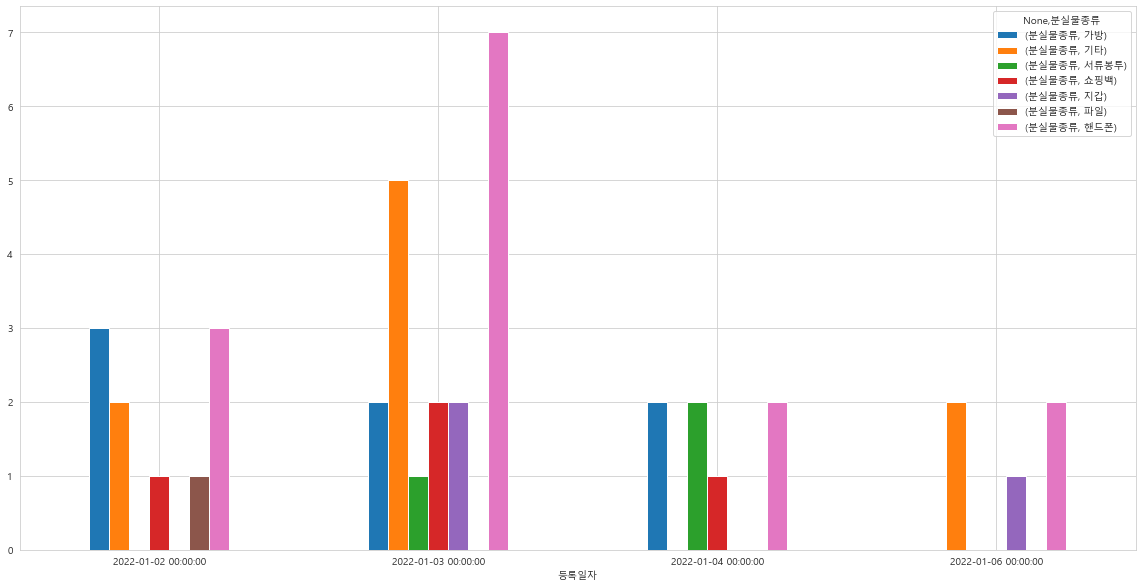

In [385]:
Recent_new = Recent.groupby(['등록일자','분실물종류'])['분실물종류'].count()
Recent_new = pd.DataFrame(Recent_new)
Rc = Recent_new.unstack(level=-1, fill_value=None)
Rc.plot.bar(rot = 0, figsize=(20,10))
plt.show()

In [382]:
# years_day = pd.DataFrame(years, columns = ['등록일자','분실물종류'])

# jan_new.reset_index(drop = False)
# jan_new.drop_duplicates(['등록일자'])
# jn = jan_new.loc[~jan_new.index.duplicated(keep='last')]
# jan_new = jan_new.sort_index()
# jan_new.set_index(['등록일자','분실물종류'])
# pd.pivot_table(January, index = ['등록일자','분실물종류'])
# jan_new.plot.bar(rot = 90, figsize=(20,10))
# jan_new.plot(kind='area',stacked=False,figsize=(20,10),fontsize=20,alpha=0.8)
# pd.get_dummies(jan_day)
# jan_day()
# pd.get_dummies(jan_day).plot.bar(x = '', y = ''figsize=(20,20))

# 월별 분실물종류별 합계 막대그래프

<AxesSubplot:xlabel='1년'>

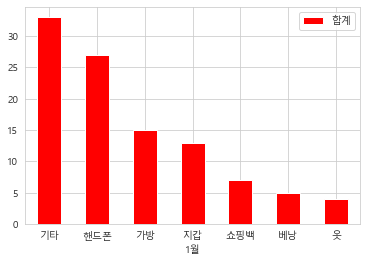

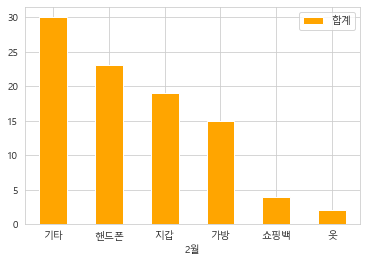

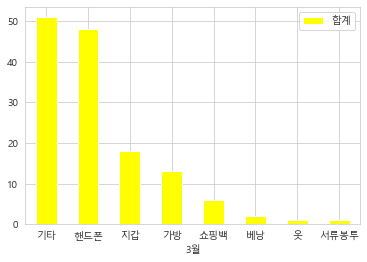

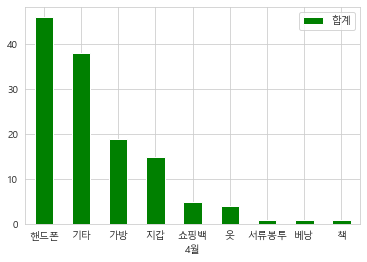

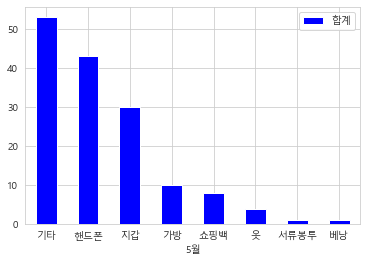

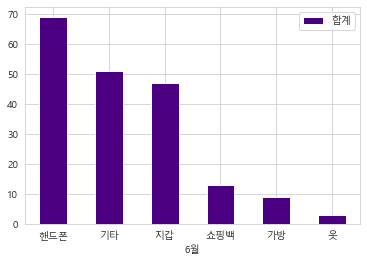

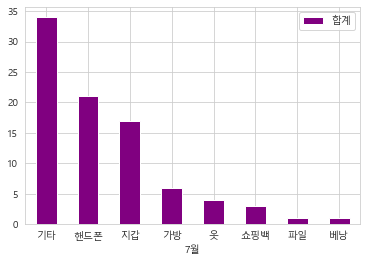

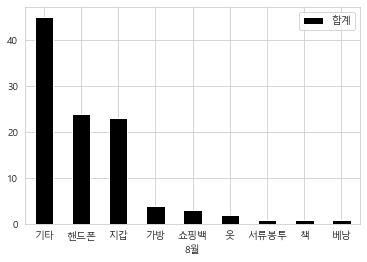

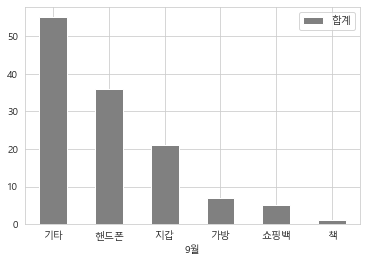

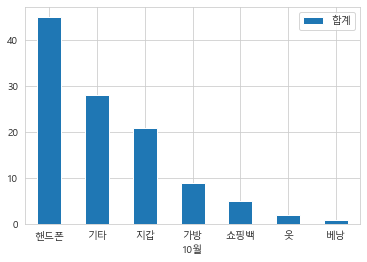

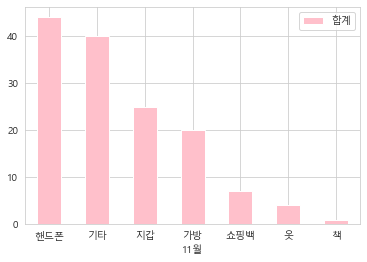

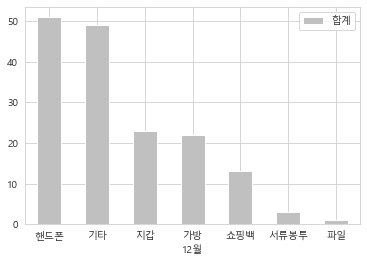

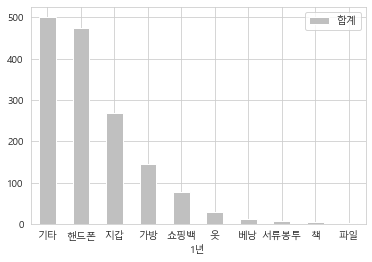

In [386]:
January_df.plot.bar(x='1월', y='합계', rot=0, color = 'red')
February_df.plot.bar(x='2월', y='합계', rot=0, color = 'orange')
March_df.plot.bar(x='3월', y='합계', rot=0, color = 'yellow')
April_df.plot.bar(x='4월', y='합계', rot=0, color = 'green')
May_df.plot.bar(x='5월', y='합계', rot=0, color = 'blue')
June_df.plot.bar(x='6월', y='합계', rot=0, color = 'indigo')
July_df.plot.bar(x='7월', y='합계', rot=0, color = 'purple')
August_df.plot.bar(x='8월', y='합계', rot=0, color = 'black')
September_df.plot.bar(x='9월', y='합계', rot=0, color = 'gray')
October_df.plot.bar(x='10월', y='합계', rot=0)
November_df.plot.bar(x='11월', y='합계', rot=0, color = 'pink')
December_df.plot.bar(x='12월', y='합계', rot=0, color = 'silver')
years_df.plot.bar(x='1년', y='합계', rot=0, color = 'silver')

# 월별 분실물 총 합계 막대그래프

<AxesSubplot:>

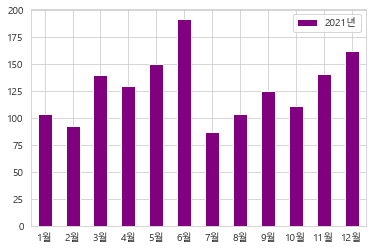

In [387]:
col_name = ["2021년"]
sum_list = [January['분실물종류'].value_counts().sum(), February['분실물종류'].value_counts().sum(), March['분실물종류'].value_counts().sum(),April['분실물종류'].value_counts().sum(),May['분실물종류'].value_counts().sum(), June['분실물종류'].value_counts().sum(), July['분실물종류'].value_counts().sum(), August['분실물종류'].value_counts().sum(), September['분실물종류'].value_counts().sum(), October['분실물종류'].value_counts().sum(), November['분실물종류'].value_counts().sum(), December['분실물종류'].value_counts().sum()]
sum_df = pd.DataFrame(sum_list, columns=col_name, index = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])

sum_df.plot.bar(rot=0, color = 'purple')

# 월별 분실물의 종류별 빈도를 나타낸 파이차트

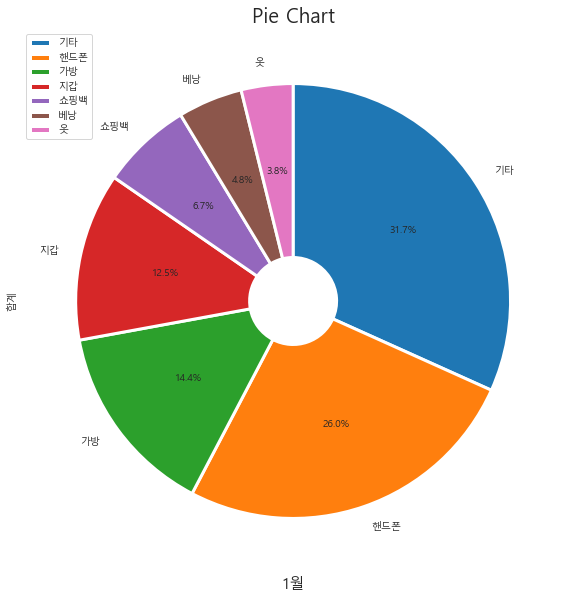

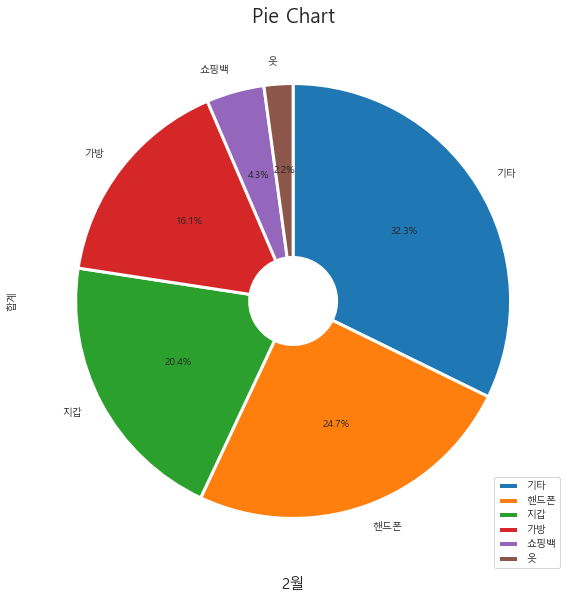

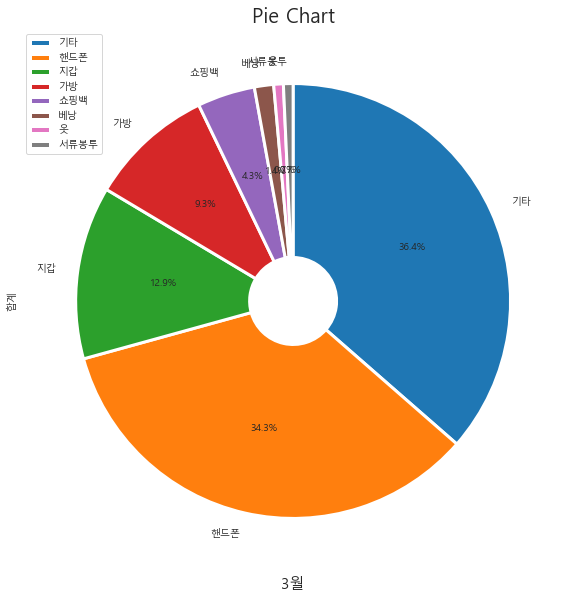

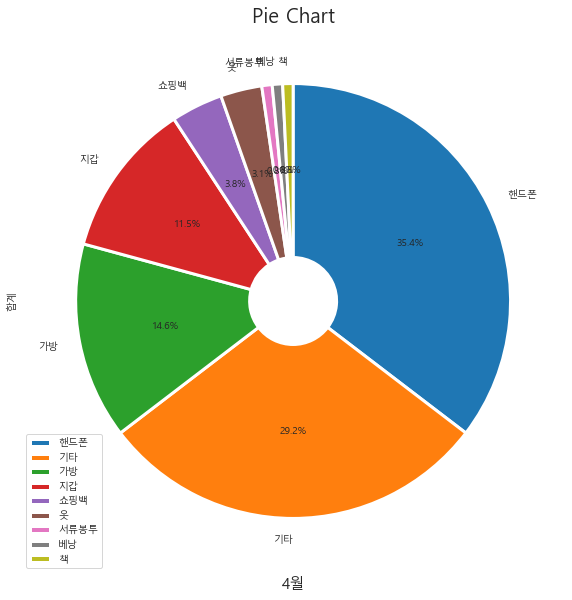

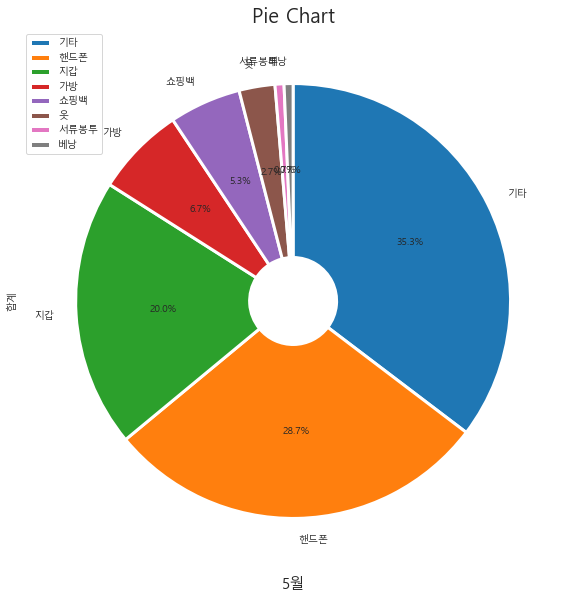

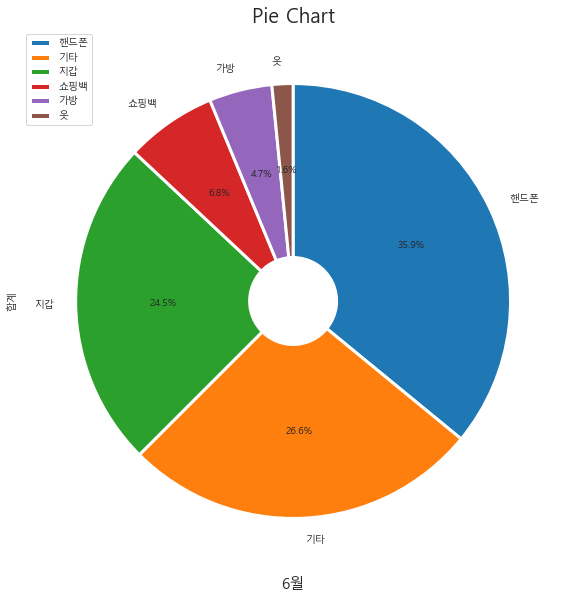

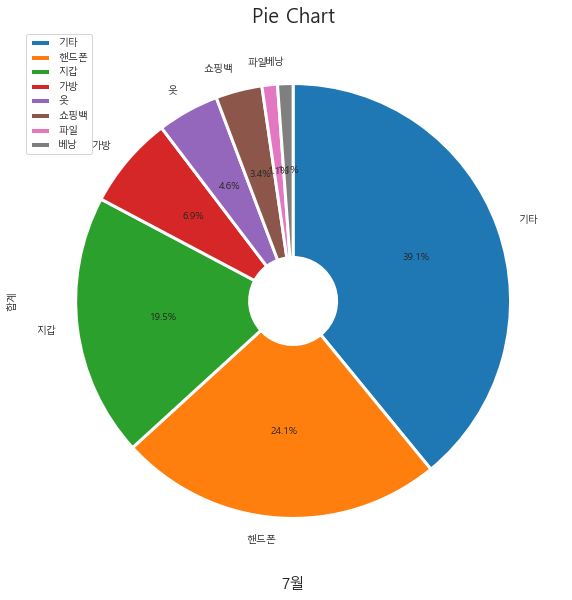

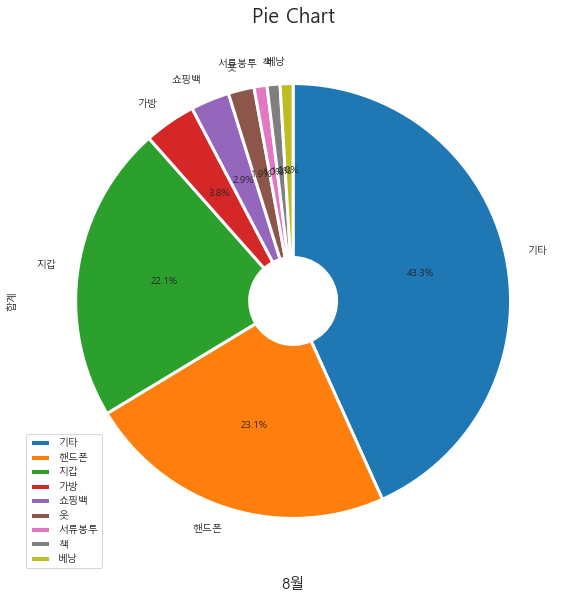

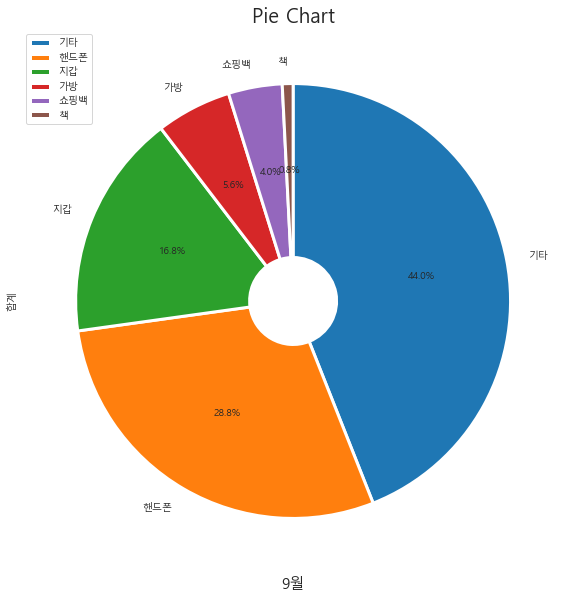

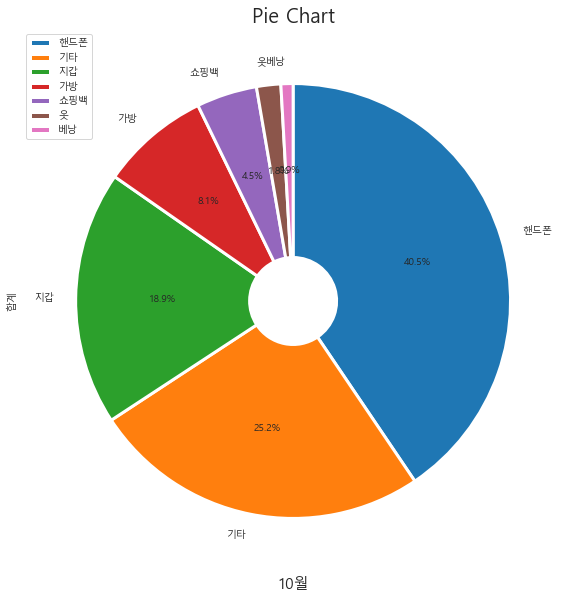

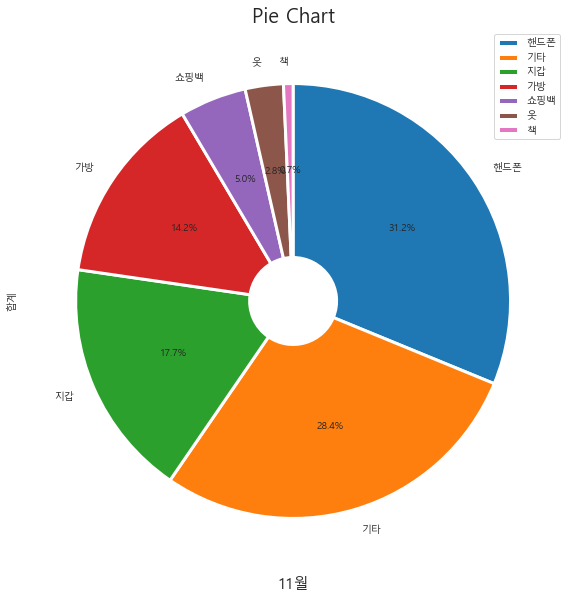

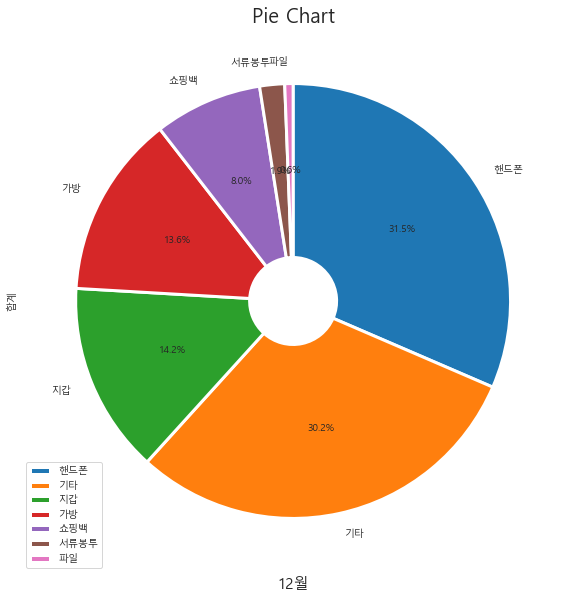

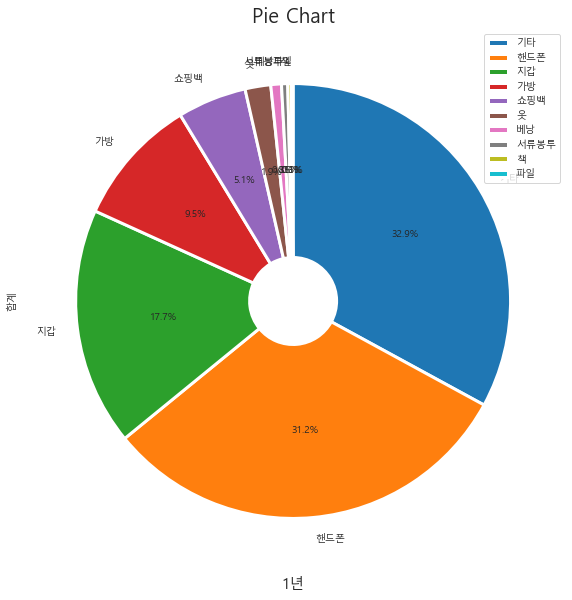

In [388]:
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}

January_df.plot.pie(x = '1월', y = '합계', labels = January_df['1월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("1월",fontsize=15)

February_df.plot.pie(x = '2월', y = '합계', labels = February_df['2월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("2월",fontsize=15)

March_df.plot.pie(x = '3월', y = '합계', labels = March_df['3월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("3월",fontsize=15)

April_df.plot.pie(x = '4월', y = '합계', labels = April_df['4월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("4월",fontsize=15)

May_df.plot.pie(x = '5월', y = '합계', labels = May_df['5월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("5월",fontsize=15)

June_df.plot.pie(x = '6월', y = '합계', labels = June_df['6월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("6월",fontsize=15)

July_df.plot.pie(x = '7월', y = '합계', labels = July_df['7월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("7월",fontsize=15)

August_df.plot.pie(x = '8월', y = '합계', labels = August_df['8월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("8월",fontsize=15)

September_df.plot.pie(x = '9월', y = '합계', labels = September_df['9월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("9월",fontsize=15)

October_df.plot.pie(x = '10월', y = '합계', labels = October_df['10월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("10월",fontsize=15)

November_df.plot.pie(x = '11월', y = '합계', labels = November_df['11월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("11월",fontsize=15)

December_df.plot.pie(x = '12월', y = '합계', labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
# plt.pie(December_df['합계'], labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%', wedgeprops=wedgeprops) #이런식으로도 표현가능
plt.title("Pie Chart", fontsize=20)
plt.xlabel("12월",fontsize=15)

years_df.plot.pie(x = '1년', y = '합계', labels = years_df['1년'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("1년",fontsize=15)

plt.show()